#CBE 162 Fall 2024 Lab 6 :Linearization and Second Order Systems

#  Linearization
## Problem 1



Consider a mixing tank where both the flow rate $F(t)$ and the inlet concentration of a solute $C_{A0}(t)$ vary with time. The mass balance equation for the solute is given by:

$$
\frac{dC_A}{dt} = \frac{F(t)}{V}(C_{A0}(t) - C_A(t)) - kC_A^2(t)
$$

where:
- $C_A(t)$ is the concentration of the solute at time $t$,
- $F(t)$ is the flow rate at time $t$,
- $C_{A0}(t)$ is the inlet concentration of the solute,
- $V$ is the volume of the tank,
- $k$ is the reaction rate constant.

Linearize this equation around the steady-state described below. Then, find the Laplace transform of the linearized equation to derive the transfer function model.




In [1]:

# Parameters
F_s = 1.0  # Steady-state flow rate (L/min)
C_A_s = 0.5  # Steady-state concentration (mol/L)
V = 2.0  # Volume of the tank (L)
k = 0.1  # Reaction rate constant (L/mol*min)
Ca_0ss=0.55 # Inlet concentration(mol/L)

#rahil added this
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, tf2zpk
from scipy.integrate import solve_ivp

**1.1** Derive the transfer function of the bulk solute concentration against the inlet flow rate. Plot the change in concentration against time, until t=50 min, when flow rate is increased by 2% as a step change (Assume constant volume). First, use scipy.signal, and then verify your answer using an ODE solver.

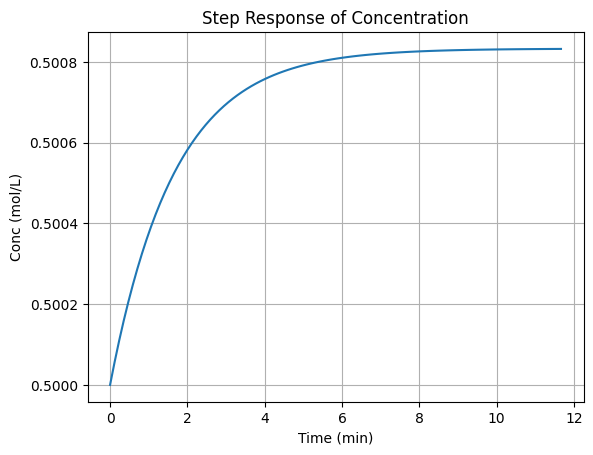

In [2]:
numerator = [(Ca_0ss - C_A_s)/V]
denominator = [1, F_s/V + 2*k*C_A_s]

sys = TransferFunction(numerator, denominator)

t = np.linspace(0, 50, 100)
step_input = 0.02 * F_s

t, y = step(sys)

y = step_input * y

plt.plot(t, y + C_A_s)
plt.title("Step Response of Concentration")
plt.xlabel("Time (min)")
plt.ylabel("Conc (mol/L)")
plt.grid(True)

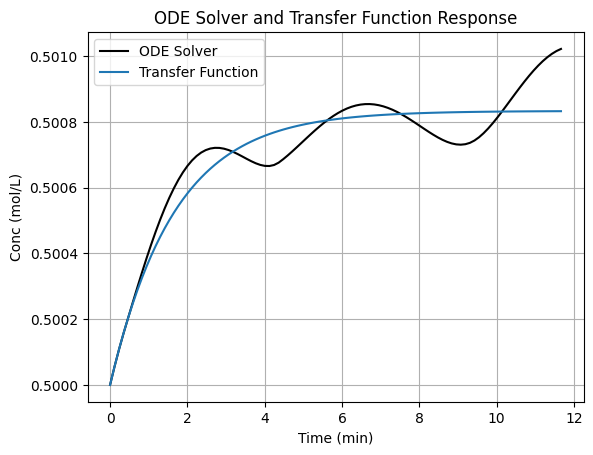

In [3]:
def mass_balance(t, C_A, F):
    return (F / V) * (Ca_0ss - C_A) - k * C_A**2

F_new = F_s * 1.02
initial_C_A = C_A_s

sol = solve_ivp(mass_balance, [0, 50], [initial_C_A], args=(F_new,), t_eval=t)

plt.plot(sol.t, sol.y[0], label='ODE Solver', color = '0')
plt.plot(t, y + C_A_s, label='Transfer Function')
plt.title("ODE Solver and Transfer Function Response")
plt.xlabel("Time (min)")
plt.ylabel("Conc (mol/L)")
plt.legend()

plt.grid(True)


1.2 Similarly, plot the change in concentration against time, until t=50 min, when Ca_0 is increased by 2% as a step change. First, use scipy.signal, and then verify your answer using an ODE solver.

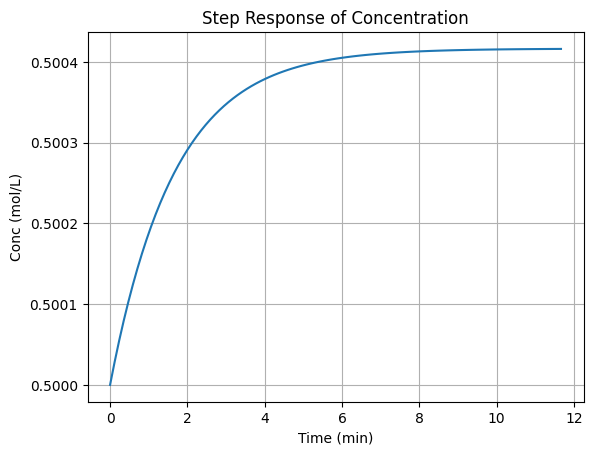

In [4]:
numerator = [(Ca_0ss - C_A_s)/V]
denominator = [1, F_s/V + 2*k*C_A_s]

sys = TransferFunction(numerator, denominator)

t = np.linspace(0, 50, 100)
step_input = 0.02 * C_A_s

t, y = step(sys)

y = step_input * y

plt.plot(t, y + C_A_s)  
plt.title("Step Response of Concentration")
plt.xlabel("Time (min)")
plt.ylabel("Conc (mol/L)")
plt.grid(True)

1.3 Plot the change in outlet concentration when both flow rate and Inlet concentration are increased by 2%. Use an ODE solver.

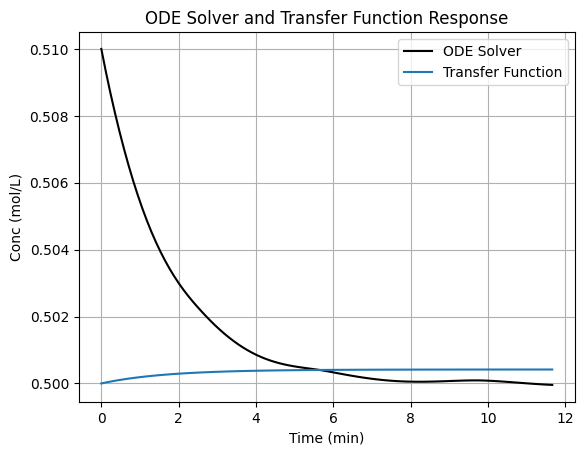

In [5]:
def mass_balance(t, C_A, F):
    return (F / V) * (Ca_0ss - C_A) - k * C_A**2

F_new = F_s
new_C_A_s = C_A_s * 1.02

sol = solve_ivp(mass_balance, [0, 50], [new_C_A_s], args=(F_new,), t_eval=t)

plt.plot(sol.t, sol.y[0], label='ODE Solver', color = '0')
plt.plot(t, y + C_A_s, label='Transfer Function')
plt.title("ODE Solver and Transfer Function Response")
plt.xlabel("Time (min)")
plt.ylabel("Conc (mol/L)")
plt.legend()

plt.grid(True)


1.4 Plot the change in outlet concentration when flow rate is increased by 5% as an impulse, using scipy.signal. Documentation [_here_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html#impulse)

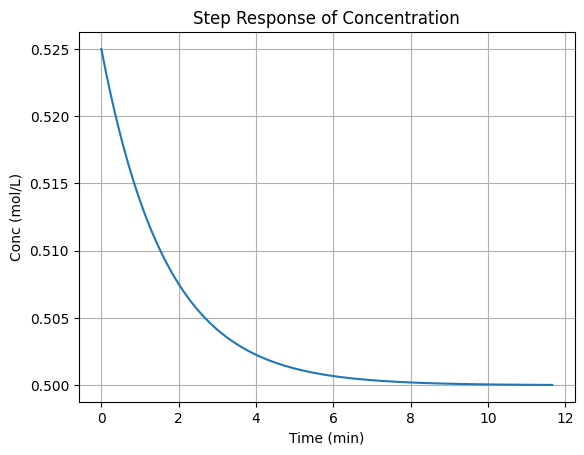

In [6]:
numerator = [(Ca_0ss - C_A_s)/V]
denominator = [1, F_s/V + 2*k*C_A_s]

sys = TransferFunction(numerator, denominator)

t = np.linspace(0, 50, 100)
five_impulse = 0.05 * C_A_s

t, y = impulse(sys)

plt.plot(t, y + C_A_s)  
plt.title("Step Response of Concentration")
plt.xlabel("Time (min)")
plt.ylabel("Conc (mol/L)")
plt.grid(True)

## Second Order Systems

 The transfer function of a second order system in standard form is as follows:

$$ Y(s) = \frac{K}{\tau^2 s^2 + 2\zeta \tau s + 1}U(s)$$

The zeta parameter is a damping coefficient and it dictates oscillatory response in the system to a non-oscillatory input.

You can see that for two first order systems in series, the overall time constant is $\sqrt {\tau _1 \tau _2} $, since the two transfer functions would multiply. $\zeta$ would be the solution to the equation $2 \zeta \tau = (\tau _1 + \tau _2)$

For all cases, plot the response until t=20τ

## Problem 2

2.1 Start with a second order system, with the values shown below. Plot a unit step response to the system using signal.step.


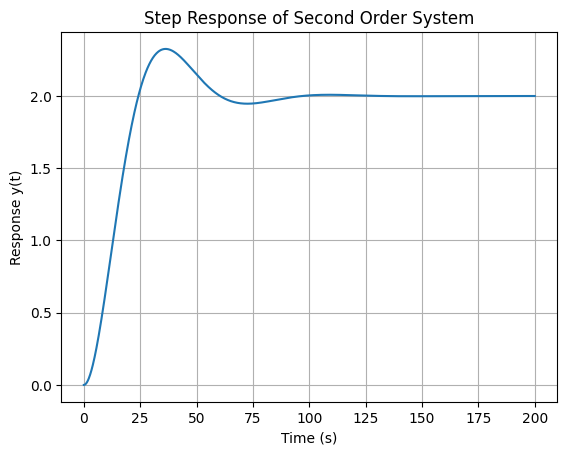

In [7]:
K = 2
tau = 10
zeta = 0.5

numerator = [K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = step(system, T=t)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

2.2 Plot the response for ζ=0.75, for a unit step change

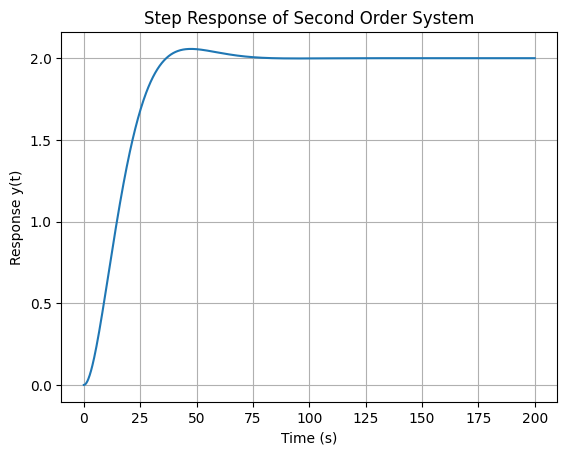

In [8]:
zeta = 0.75

numerator = [K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = step(system, T=t)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

2.3 Plot the response for ζ=1.5, for a unit step change

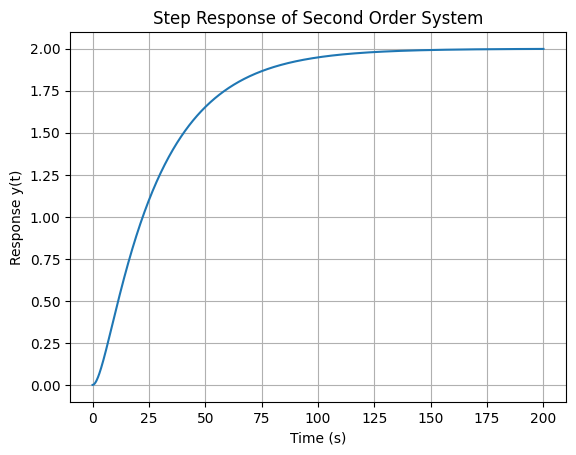

In [9]:
zeta = 1.5

numerator = [K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = step(system, T=t)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

2.4 Now, find the poles of the transfer function for the case where ζ=1.5 case, using the poles attribute of the signal library. Documentation [_here_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html#transferfunction)

In [10]:
_, poles, _ = tf2zpk(system.num, system.den)

print(poles)

[-0.2618034 -0.0381966]


2.5 For the case where ζ=0.75, plot the response for a unit impulse change. Documentation [_here_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html#impulse)

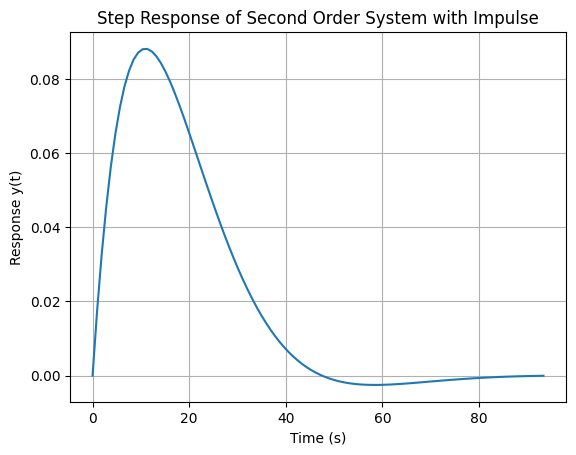

In [11]:
zeta = 0.75

numerator = [K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = impulse(system)

plt.plot(t, y)
plt.title("Step Response of Second Order System with Impulse")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

2.6. Consider a case where the transfer function is:

$$ Y(s) = \frac{K (\tau_3 s+1)}{\tau^2 s^2 + 2\zeta \tau s + 1}U(s)$$

In the transfer function wherein ζ=0.75, take 3 cases:

$$\tau_3=0.01$$
$$\tau_3=10$$
$$\tau_3=100$$
For each case, plot the response to a unit step change

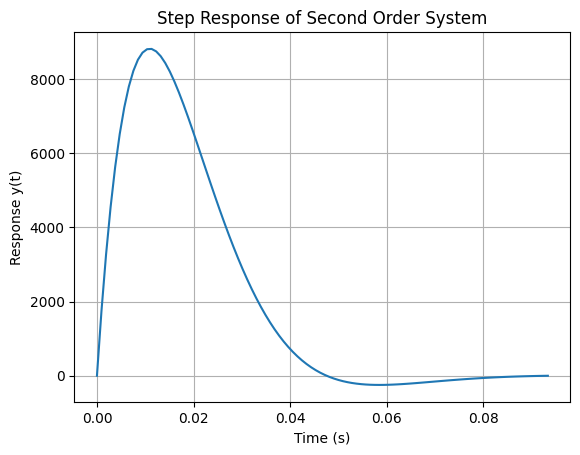

In [12]:
K = 2
tau = 0.01 # case 1 
tau_3 = 100
zeta = 0.75

numerator = [K*tau_3, K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 200 * tau, 1000)
t, y = step(system)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

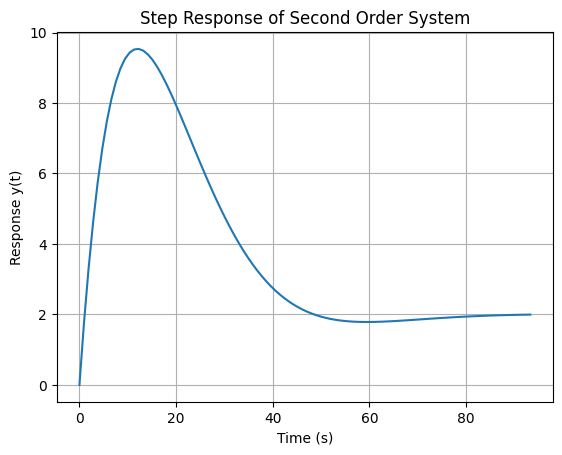

In [13]:
tau = 10 # case 2
tau_3 = 100
zeta = 0.75

numerator = [K*tau_3, K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = step(system)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)

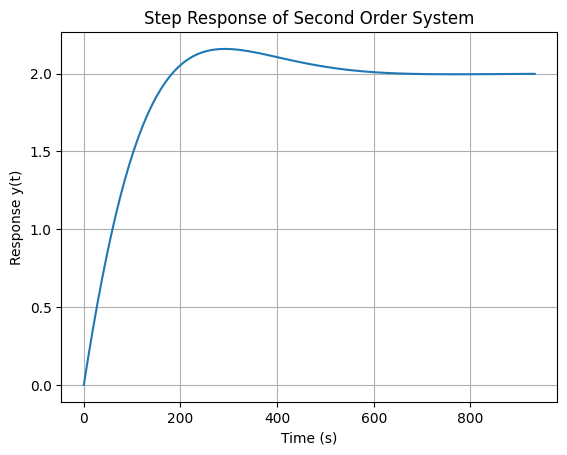

In [14]:
tau_3 = 100
tau = tau_3
zeta = 0.75

numerator = [K*tau_3, K]
denominator = [tau**2, 2*zeta*tau, 1]

system = TransferFunction(numerator, denominator)

t = np.linspace(0, 20 * tau, 1000)
t, y = step(system)

plt.plot(t, y)
plt.title("Step Response of Second Order System")
plt.xlabel("Time (s)")
plt.ylabel("Response y(t)")
plt.grid(True)